In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**First Dataset**

In [2]:
df = pd.read_excel('actas-defuncion-covid-19-cdmx.xlsx')
df.sample(5)

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
58,93 AÑOS,2020-04-06,15,4,NEUMONIA SECUNDARIA A SARS-COV-2 INSUFICIENCIA...,8872
4297,58 AÑOS,2020-05-10,20,5,"INSUFICIENCIA RESPIRATORIA,NEUMONIA ATIPICA, P...",1916
67,75 AÑOS,2020-04-07,15,4,"CHOQUE SEPTICO, NEUMONIA DEBIDA A CORONAVIRUS ...",8904
2450,58 AÑOS,2020-05-02,18,5,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA ATI...",1290
1195,67 AÑOS,2020-04-26,18,4,"INSUFICIENCIA RESPIRATORIA AGUDA GRAVE, NEUMON...",5576


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   object        
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 214.8+ KB


In [4]:
df.describe()

,SEMANA,MES,ACTA
count,4579.000000,4579.000000,4579.000000
mean,18.158768,4.544224,7028.533086
std,1.238276,0.505495,3980.228596
min,12.000000,3.000000,1.000000
25%,17.000000,4.000000,5116.000000
50%,18.000000,5.000000,6942.000000
75%,19.000000,5.000000,10649.500000
max,20.000000,5.000000,13563.000000


In [5]:
df['EDAD'] = df['EDAD'].str.rstrip('DIASAÑOSMESES')
df.head()

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
0,41,2020-03-18,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
1,61,2020-03-23,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2,60,2020-03-26,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
3,37,2020-03-26,13,3,NEUMONIA POR CORONAVIRUS,7879
4,63,2020-03-26,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [0]:
df['EDAD'] = df['EDAD'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   int64         
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 214.8+ KB


In [8]:
df.corr()

,EDAD,SEMANA,MES,ACTA
EDAD,1.000000,0.023771,0.028012,0.000489
SEMANA,0.023771,1.000000,0.779375,0.058207
MES,0.028012,0.779375,1.000000,0.052269
ACTA,0.000489,0.058207,0.052269,1.000000


In [9]:
df.columns

Index(['EDAD', 'FECHA', 'SEMANA', 'MES', 'RAZON', 'ACTA'], dtype='object')

In [0]:
df = df.set_index('FECHA')

In [11]:
df.head()

,EDAD,SEMANA,MES,RAZON,ACTA
FECHA,,,,,
2020-03-18,41,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
2020-03-23,61,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2020-03-26,60,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
2020-03-26,37,13,3,NEUMONIA POR CORONAVIRUS,7879
2020-03-26,63,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [12]:
df.index #fechas: from 2020-03-18 to 2020-05-12

DatetimeIndex(['2020-03-18', '2020-03-23', '2020-03-26', '2020-03-26',
               '2020-03-26', '2020-03-27', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-29',
               ...
               '2020-05-12', '2020-05-12', '2020-05-12', '2020-05-12',
               '2020-05-12', '2020-05-12', '2020-05-12', '2020-05-12',
               '2020-05-12', '2020-05-12'],
              dtype='datetime64[ns]', name='FECHA', length=4579, freq=None)

Text(0, 0.5, 'Muertes')

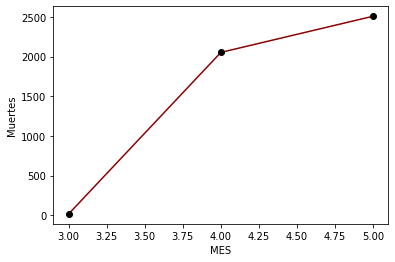

In [216]:
df.groupby(['MES']).size().plot(color='darkred')
plt.plot(df.groupby(['MES']).size(),'ko')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

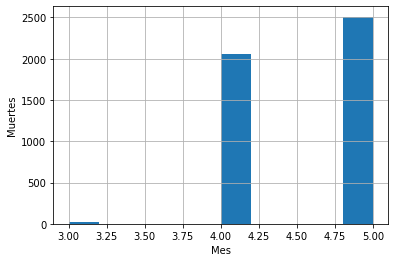

In [218]:
df.MES.hist()
plt.xlabel('Mes')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

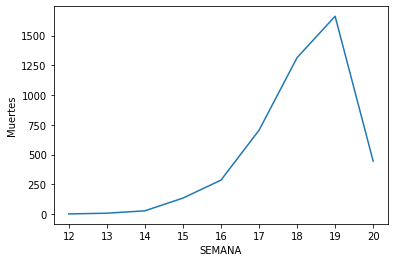

In [105]:
df.groupby(['SEMANA']).size().plot()
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

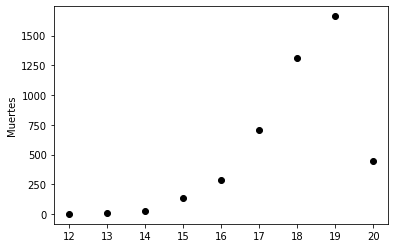

In [106]:
plt.plot(df.groupby(['SEMANA']).size(),'ko')
plt.ylabel('Muertes')

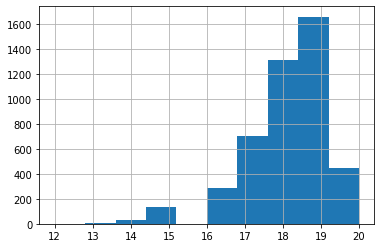

In [175]:
df['SEMANA'].hist()

Text(0, 0.5, 'Muertes')

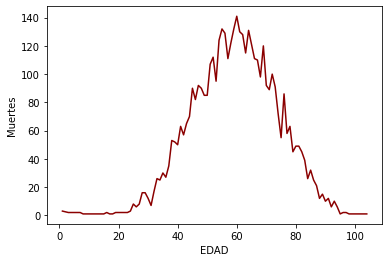

In [104]:
df.groupby(['EDAD']).size().plot(color='darkred')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

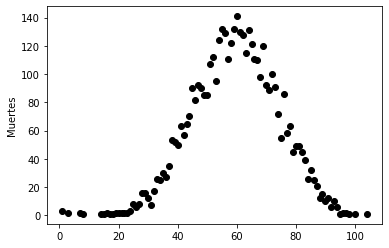

In [102]:
plt.plot(df.groupby(['EDAD']).size(), 'ko')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

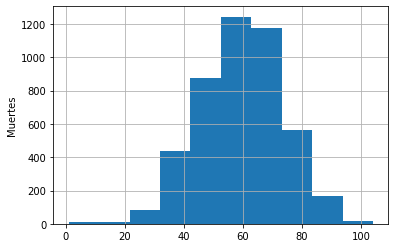

In [219]:
df.EDAD.hist()
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

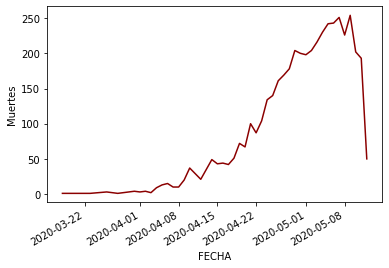

In [98]:
df.groupby(df.index).size().plot(color='darkred')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

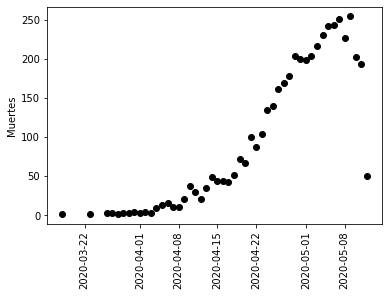

In [99]:
plt.plot(df.groupby(df.index).size(),'ko')
plt.xticks(rotation=90)
plt.ylabel('Muertes')

(array([737506., 737516., 737523., 737530., 737537., 737546., 737553.]),
 <a list of 7 Text major ticklabel objects>)

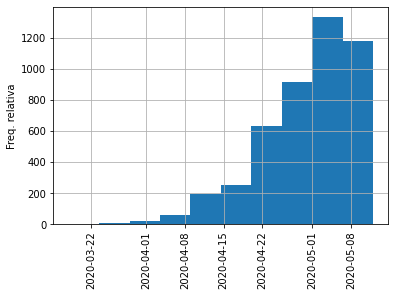

In [174]:
(pd.Series(df.index)).hist()
plt.ylabel('Freq. relativa')
plt.xticks(rotation=90)

In [25]:
df.groupby([df.index,'RAZON']).size()

FECHA       RAZON                                                                                                                    
2020-03-18  CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS .COV-2, DIABETES MELLITUS TIPO 2, OBESIDAD.                                   1
2020-03-23  INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIRAL COVID - 19, MIELOMA MULTIPLE, DIABETES MELLITUS TIPO 2.                     1
2020-03-26  CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMOIDE DE UTERO, DIABETES MELLITUS TIPO 2                                         1
            NEUMONIA POR CORONAVIRUS                                                                                                     1
            SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA DEBIDA A OTROS VIRUS, COVID - 19, HIPÉRTENSION ARTERIAL SISTEMICA.    1
                                                                                                                                        ..
2020-05-12  NEUMONIA ATIPICA, SO

---

**Second Data**

In [26]:
df2 = pd.read_csv('200521COVID19MEXICO.csv', encoding='latin1')  #instead encoding = 'uft-8'
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1,97,99,1,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,2
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1,97,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,1
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,2020-04-10,2020-04-07,9999-99-99,97,2,35,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1,2,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,2020-04-04,2020-04-04,9999-99-99,2,2,61,1,2,2,2,2,2,2,2,1,2,2,2,1,99,1,99,MÃ©xico,99,2


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201838 entries, 0 to 201837
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  201838 non-null  object
 1   ID_REGISTRO          201838 non-null  object
 2   ORIGEN               201838 non-null  int64 
 3   SECTOR               201838 non-null  int64 
 4   ENTIDAD_UM           201838 non-null  int64 
 5   SEXO                 201838 non-null  int64 
 6   ENTIDAD_NAC          201838 non-null  int64 
 7   ENTIDAD_RES          201838 non-null  int64 
 8   MUNICIPIO_RES        201838 non-null  int64 
 9   TIPO_PACIENTE        201838 non-null  int64 
 10  FECHA_INGRESO        201838 non-null  object
 11  FECHA_SINTOMAS       201838 non-null  object
 12  FECHA_DEF            201838 non-null  object
 13  INTUBADO             201838 non-null  int64 
 14  NEUMONIA             201838 non-null  int64 
 15  EDAD                 201838 non-nu

In [28]:
df2.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000,201838.000000
mean,1.637427,9.631516,14.678648,1.510360,16.000629,14.965116,35.916473,1.247768,73.457570,1.828248,42.615484,1.008229,50.649858,4.568575,2.258797,2.346833,2.330334,2.389332,2.205615,2.498315,2.353090,2.218532,2.347085,2.280581,33.208841,1.869816,98.570304,73.456425
std,0.480744,7.886930,7.962621,0.499894,10.905611,7.872999,46.748267,0.431717,41.039363,0.686976,16.960148,0.090342,47.496524,15.609379,6.127975,5.932637,5.938854,6.259584,6.020454,7.165276,6.032005,6.079939,5.948134,5.976557,45.692183,0.665670,6.453117,41.041943
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,97.000000,2.000000,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,97.000000
50%,2.000000,12.000000,14.000000,2.000000,15.000000,15.000000,20.000000,1.000000,97.000000,2.000000,41.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,2.000000,12.000000,20.000000,2.000000,21.000000,20.000000,46.000000,1.000000,97.000000,2.000000,53.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,120.000000,2.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,99.000000


In [0]:
from datetime import datetime

In [0]:
df2['FECHA_ACTUALIZACION'] = pd.to_datetime(df2['FECHA_ACTUALIZACION'])
df2['FECHA_INGRESO'] = pd.to_datetime(df2['FECHA_INGRESO'])
df2['FECHA_SINTOMAS'] = pd.to_datetime(df2['FECHA_SINTOMAS'])
#df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2[df2.FECHA_DEF != '9999-99-99'] #drop rows with that value

In [32]:
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1,97,99,1,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,2
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1,97,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,1
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1,2,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,2
19,2020-05-21,1df826,2,4,9,2,15,9,13,2,2020-03-21,2020-03-16,2020-03-22,2,1,78,1,97,2,1,1,2,1,1,2,2,2,1,2,99,1,99,MÃ©xico,99,2
20,2020-05-21,15cde6,2,4,25,2,25,25,6,2,2020-04-03,2020-04-03,2020-04-13,2,2,53,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,2


In [0]:
df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2.set_index('FECHA_DEF')


In [35]:
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
FECHA_DEF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-27,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2,1,71,1,97,99,1,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,2
2020-04-03,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2,2,66,1,97,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,1
2020-04-20,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2,2,67,1,2,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,2
2020-03-22,2020-05-21,1df826,2,4,9,2,15,9,13,2,2020-03-21,2020-03-16,2,1,78,1,97,2,1,1,2,1,1,2,2,2,1,2,99,1,99,MÃ©xico,99,2
2020-04-13,2020-05-21,15cde6,2,4,25,2,25,25,6,2,2020-04-03,2020-04-03,2,2,53,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,2


Text(0, 0.5, 'Muertes')

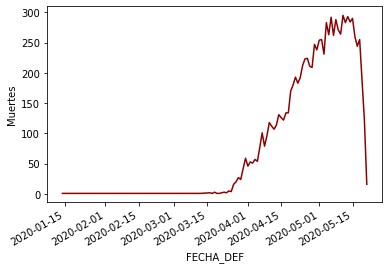

In [109]:
df2.groupby(df2.index).size().plot(color='darkred')
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

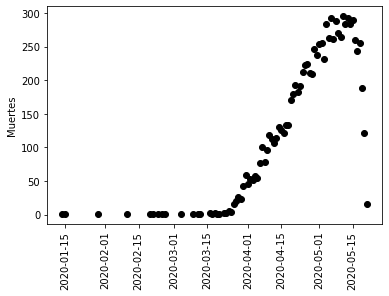

In [107]:
plt.plot(df2.groupby(df2.index).size(),'ko')
plt.xticks(rotation=90)
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

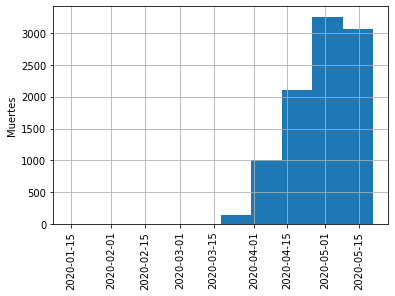

In [220]:
(pd.Series(df2.index)).hist()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

In [203]:
df2.groupby(['DIABETES']).size()

DIABETES
1     3686
2     5823
98     101
dtype: int64

In [204]:
df2.groupby(['EPOC']).size()

EPOC
1      684
2     8826
98     100
dtype: int64

In [205]:
df2.groupby(['ASMA']).size()

ASMA
1      228
2     9287
98      95
dtype: int64

In [206]:
df2.groupby(['CARDIOVASCULAR']).size()

CARDIOVASCULAR
1      686
2     8823
98     101
dtype: int64

In [207]:
df2.groupby(['RENAL_CRONICA']).size()

RENAL_CRONICA
1      823
2     8690
98      97
dtype: int64

In [208]:
df2.groupby(['TABAQUISMO']).size()

TABAQUISMO
1     1006
2     8508
98      96
dtype: int64

In [209]:
df2.groupby(['RESULTADO']).size()

RESULTADO
1    6510
2    2331
3     769
dtype: int64

---

**Comparison of two datasets**

Text(0, 0.5, 'Muertes')

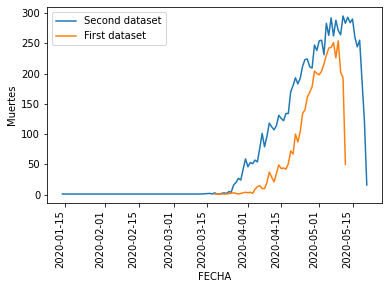

In [222]:
df2.groupby(df2.index).size().plot(label ="Second dataset")
df.groupby(df.index).size().plot(label ="First dataset")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

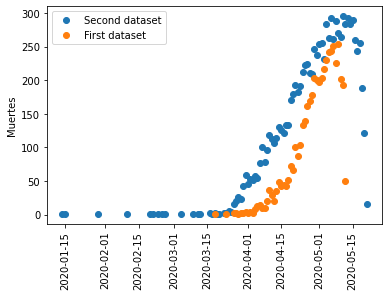

In [223]:
plt.plot(df2.groupby(df2.index).size(),'o', label="Second dataset")
plt.plot(df.groupby(df.index).size(),'o', label="First dataset")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

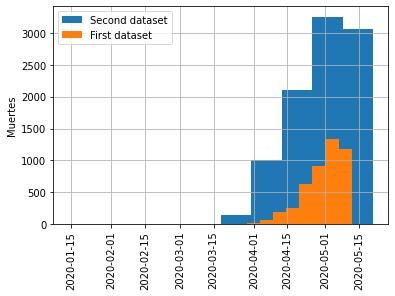

In [224]:
(pd.Series(df2.index)).hist(label="Second dataset")
(pd.Series(df.index)).hist(label="First dataset")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')